In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output
from ipywidgets import interact

In [3]:
import tensorflow as tf

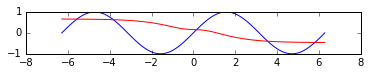

In [20]:
X_MIN = -2.0 * np.pi
X_MAX = 2.0 * np.pi

T = np.linspace(X_MIN, X_MAX, 100)

def f(x):
    return np.sin(x)

def vis():
    model_out = [y.eval({x: [[t]]})[0] for t in T]
    
    plt.gca().set_aspect('equal')
    plt.yticks([-1, 0, 1])
    
    fig = plt.plot(T, f(T), 'b', T, model_out, 'r')
    plt.plot()
    
vis()

In [49]:
# define neural net to take in 1 val, have a number of hidden, and one output

H = 20

x = tf.placeholder(tf.float32, [1, 1])
t = tf.placeholder(tf.float32, [1, 1])

W1 = tf.Variable(tf.random_normal([1, H]))
b1 = tf.Variable(tf.constant(0.1, shape=[H]))

h = tf.tanh(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.random_normal([H, 1]))
b2 = tf.Variable(tf.constant(0.1, shape=[1]))

y = tf.matmul(h, W2) + b2

cost = tf.square(y - t)

In [50]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

In [59]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

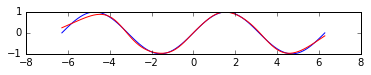

In [60]:
for i in range(20000):
    rand_x = np.random.uniform(X_MIN, X_MAX)
    session.run(train, {x: [[rand_x]], t: [[f(rand_x)]]})
    
    if i%2000==0:
        clear_output(wait=True)
        vis()
        plt.show()